This notebook contains a pipeline to visualize and rebalance the room impulse response dataset used for training. It will eventually drop some examples and double others as a matter of uniform distribution among predicted values.

In [1]:
%cd ..

/home/pcallens/room-acoustics-characterization


In [2]:
import pandas as pd
from utils.acoustic_utils import *
from subprocess import run
from utils.resample import *
import shutil

# Plot and clean RIR dataset

In [3]:
rir_dir = 'datasets/thesis/test/rir/'

print('resampling RIR directory')
rir_dir = resample_audio_dir(rir_dir)

print('trimming start of rir directory')
rir_dir = trim_silence_dir(rir_dir)


  7%|▋         | 7/100 [00:00<00:01, 67.59it/s]

resampling RIR directory
------- Normalizing directory : datasets/thesis/test/rir/ -------


 12%|█▏        | 12/100 [00:00<00:00, 114.73it/s]

trimming start of rir directory


100%|██████████| 100/100 [00:00<00:00, 110.03it/s]


In [4]:
def analyse_rir_dir(rir_dir,plot = True):
    rir_dataset = pd.DataFrame(columns = ['RIR_name','t60','c50','drr'])
    for rir_file in tqdm.tqdm(glob.glob(os.path.join(rir_dir, '*'))):
        rir_sr , rir = wavfile.read(rir_file)
        name = os.path.basename(rir_file)
        t60 = t60_impulse_avg(rir,rir_sr)
        drrs = drr_impulse(rir,rir_sr)
        c50 = clarity_avg(50,rir,rir_sr)

        new_row = {'RIR_name' : name,
                   't60' : t60,
                   'c50' : c50,
                   'drr' : drrs}
        rir_dataset = rir_dataset.append(new_row,ignore_index=True)
    if plot:
        rir_dataset.hist(figsize=(20,15),bins=50)
    return rir_dataset


100%|██████████| 100/100 [00:00<00:00, 196.97it/s]


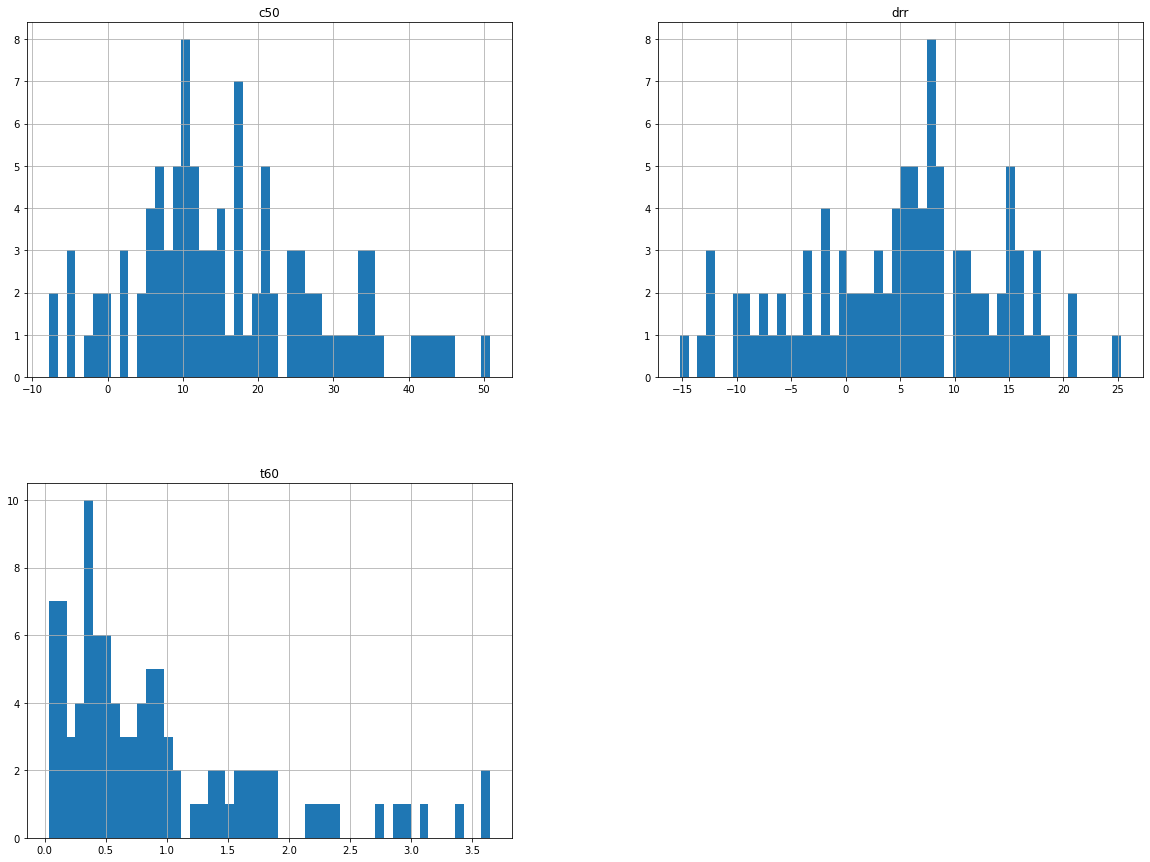

In [5]:
rir_dataset = analyse_rir_dir(rir_dir)

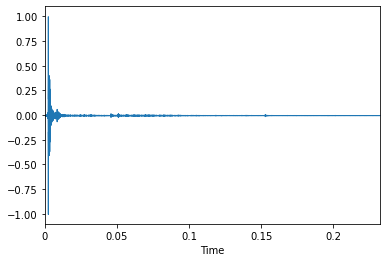

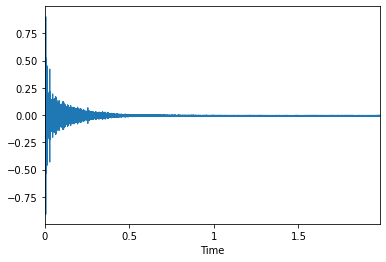

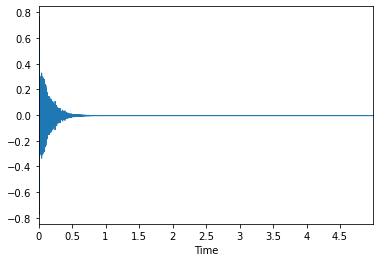

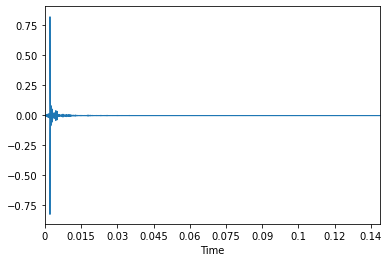

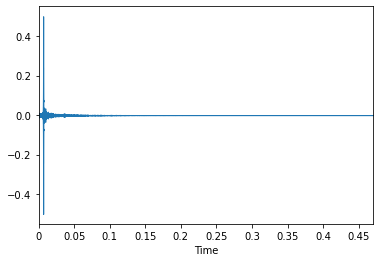

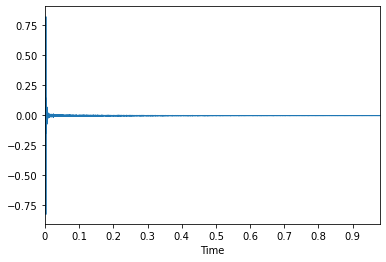

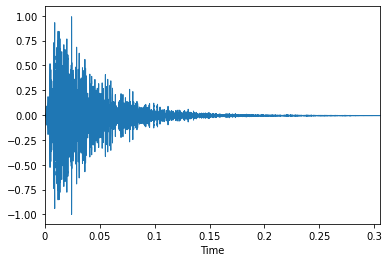

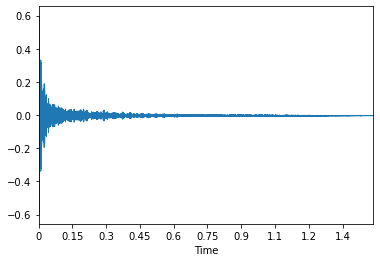

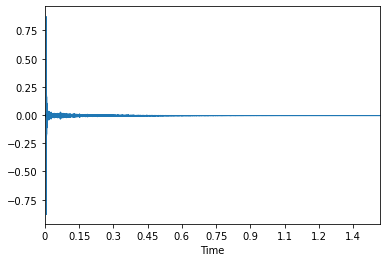

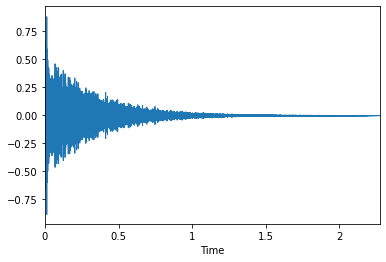

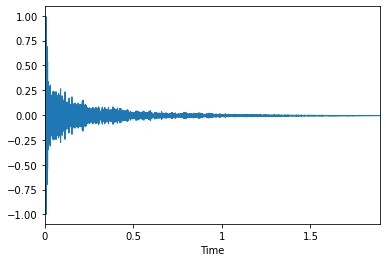

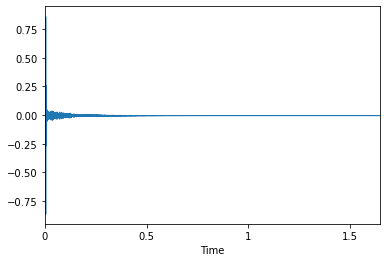

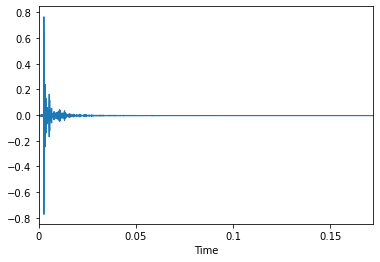

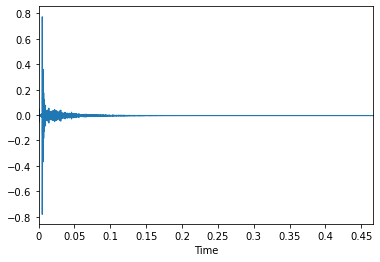

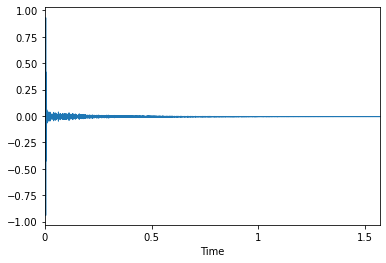

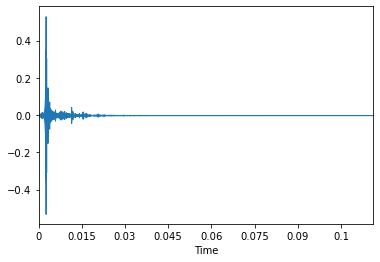

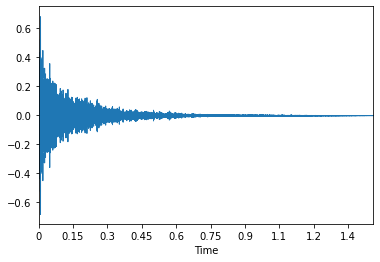

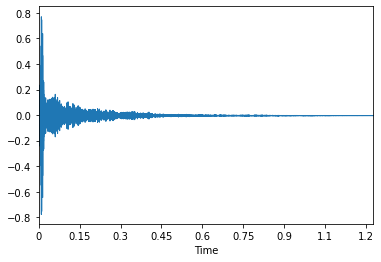

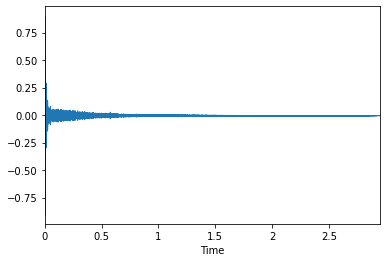

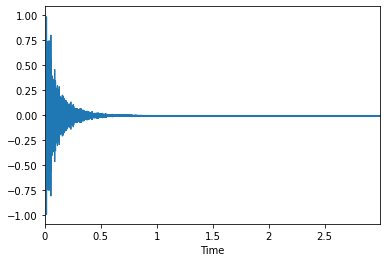

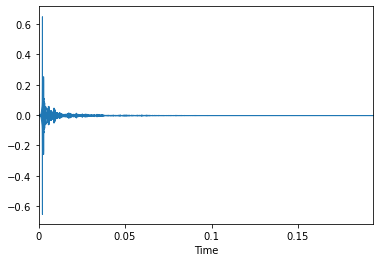

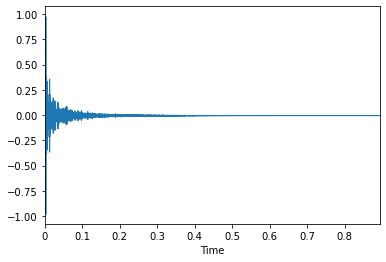

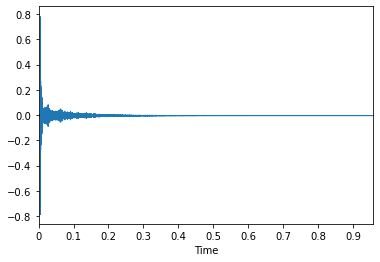

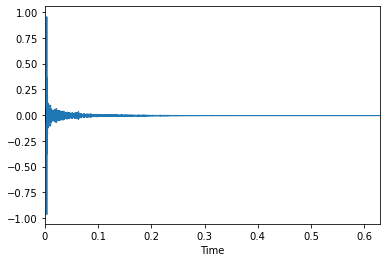

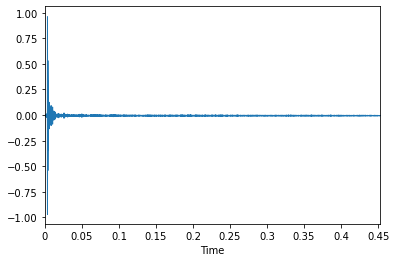

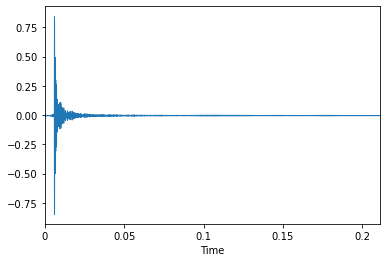

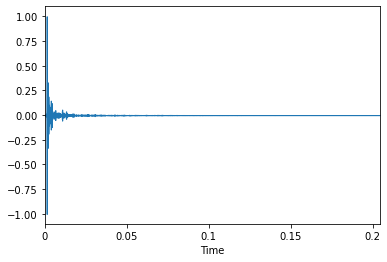

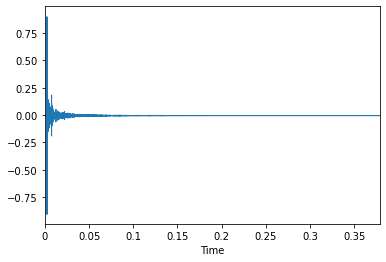

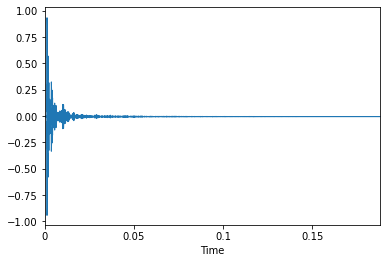

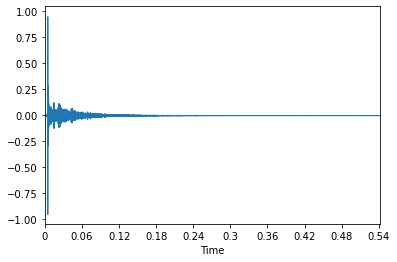

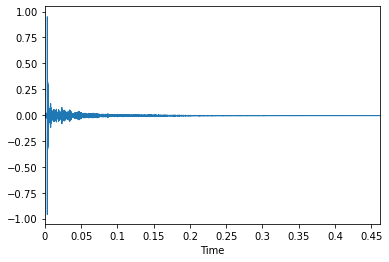

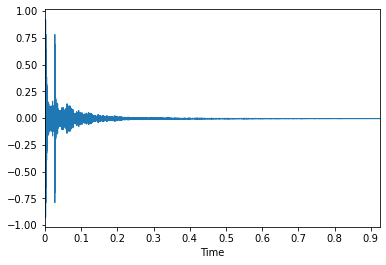

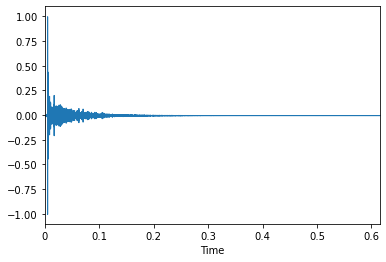

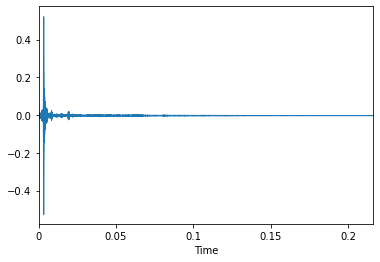

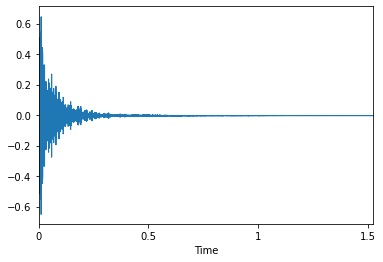

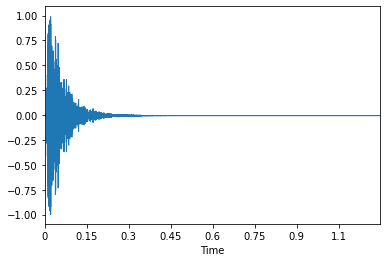

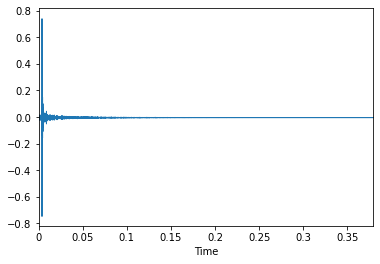

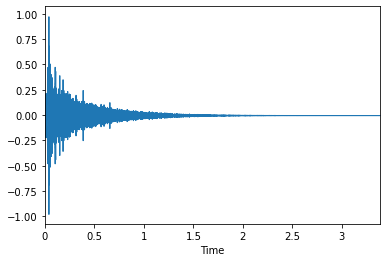

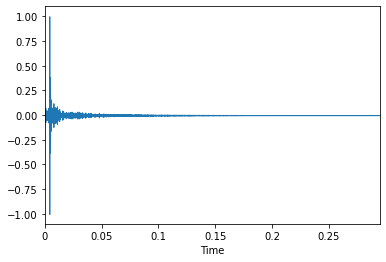

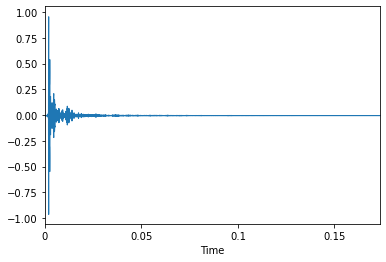

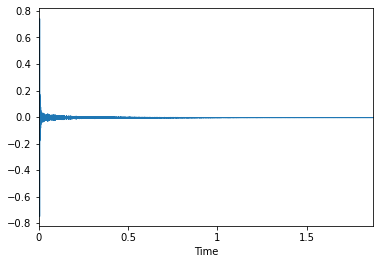

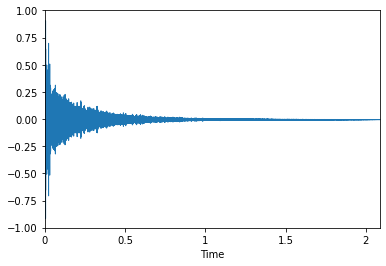

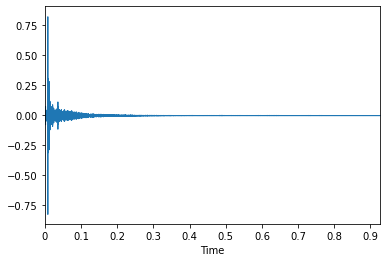

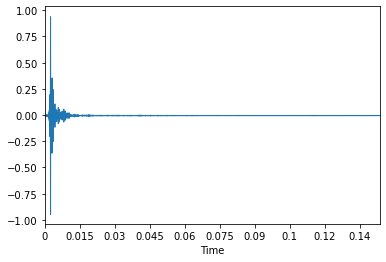

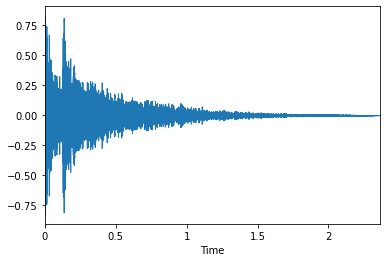

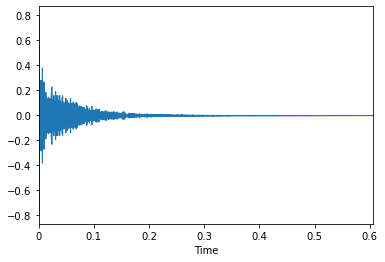

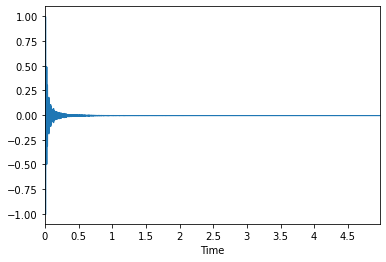

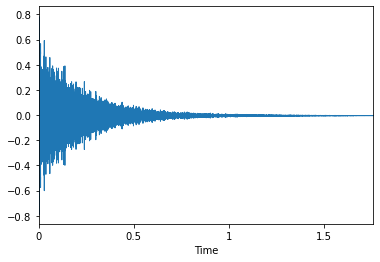

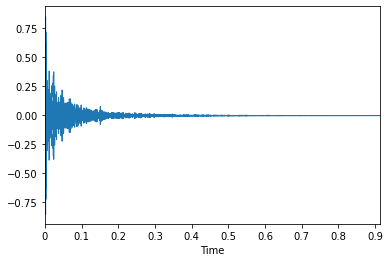

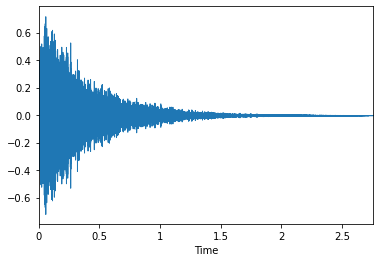

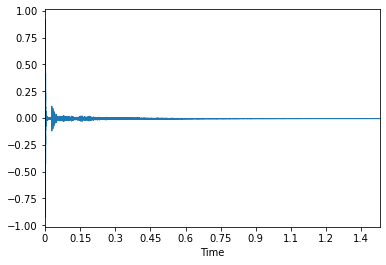

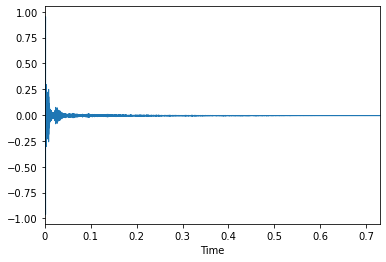

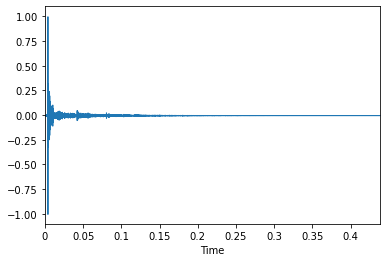

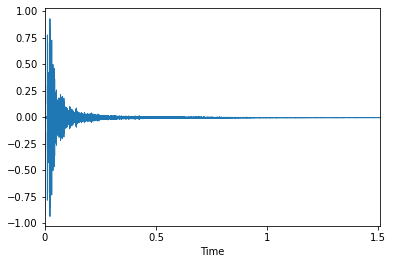

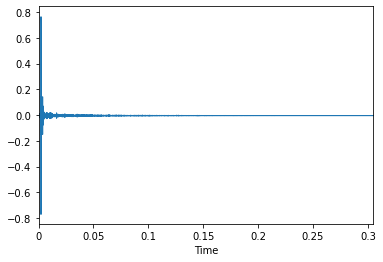

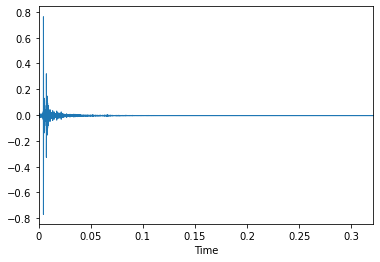

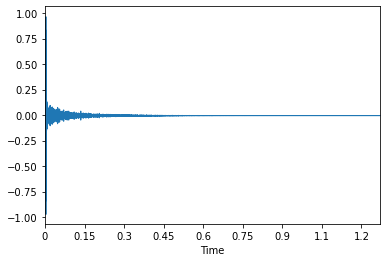

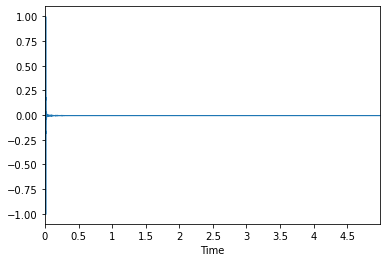

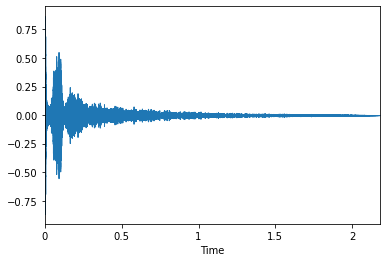

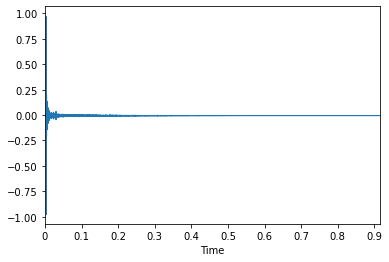

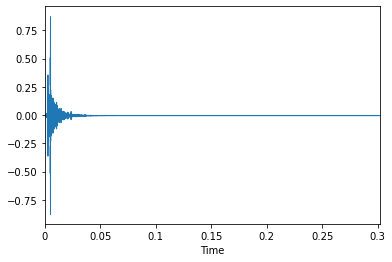

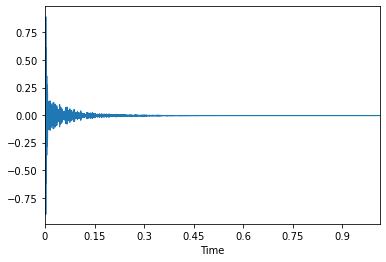

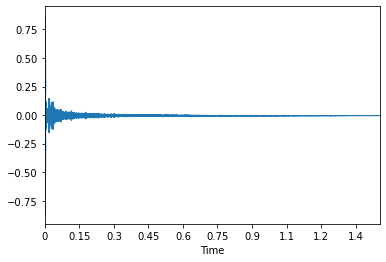

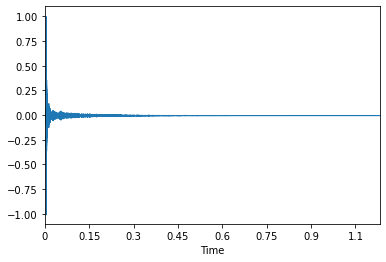

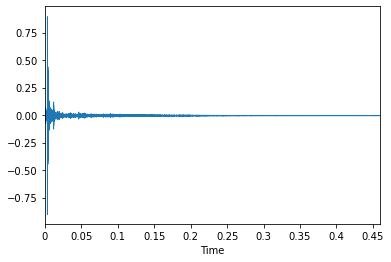

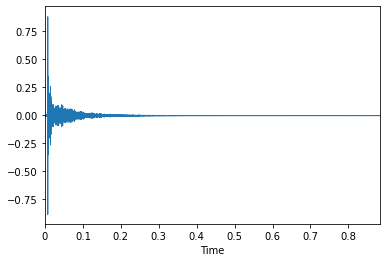

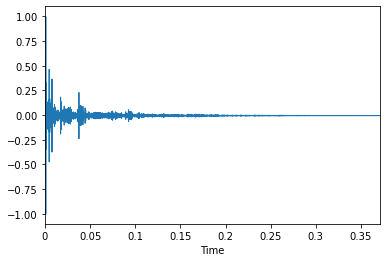

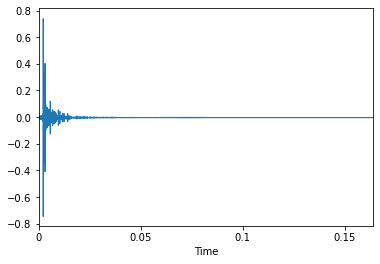

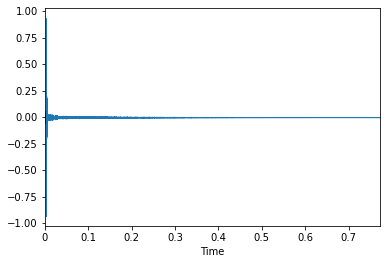

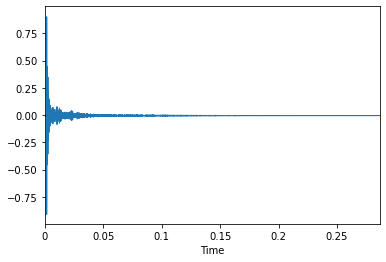

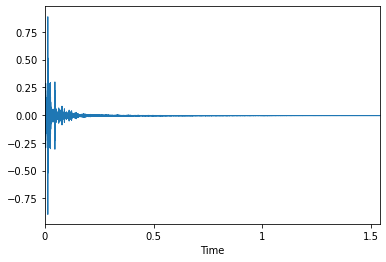

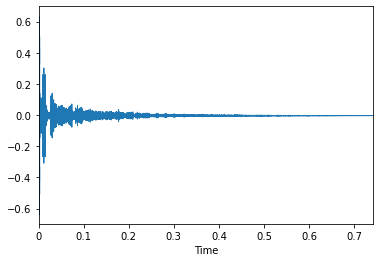

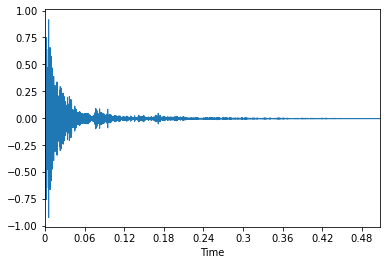

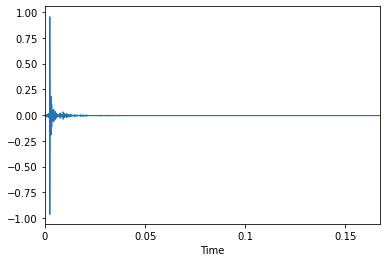

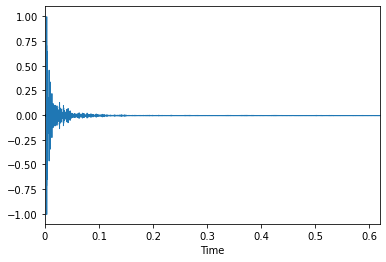

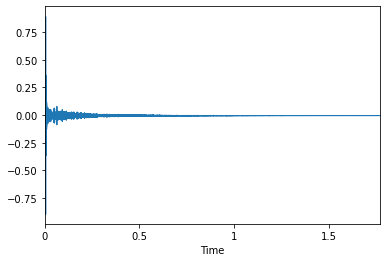

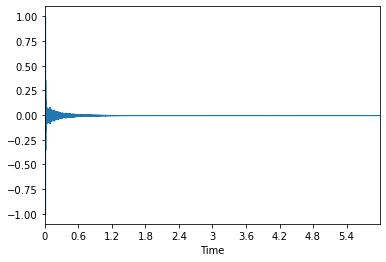

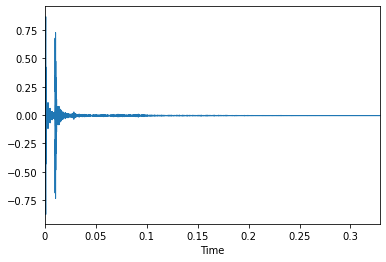

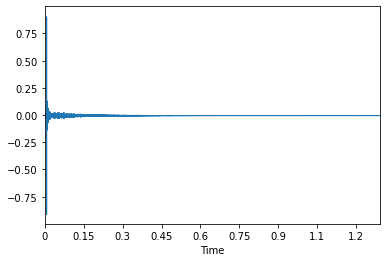

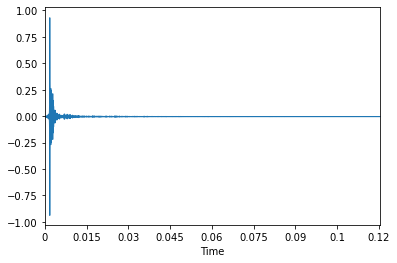

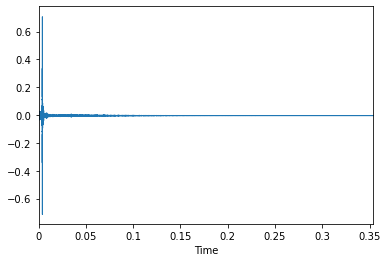

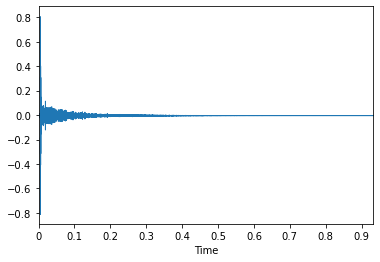

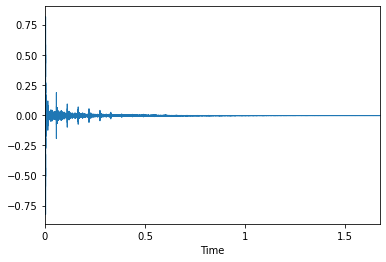

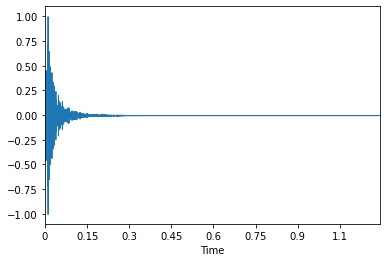

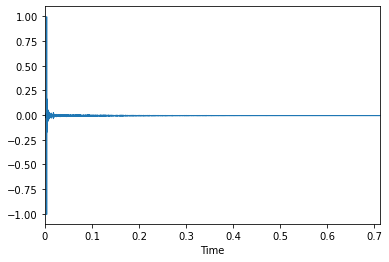

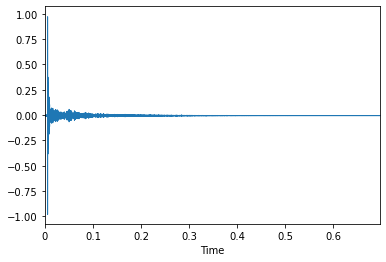

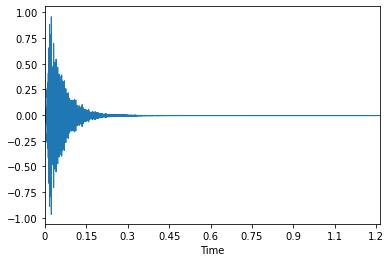

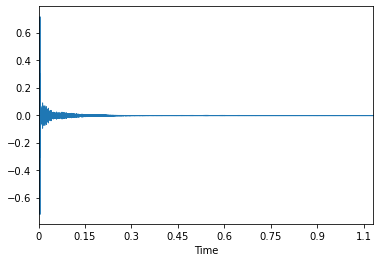

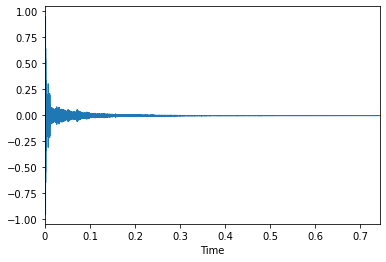

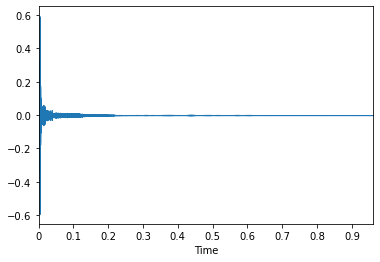

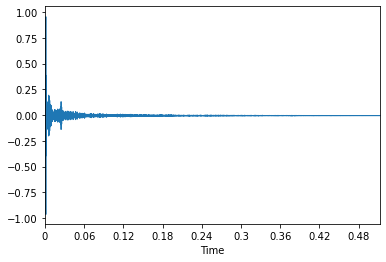

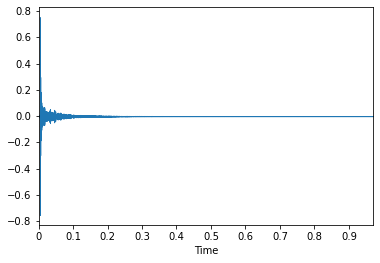

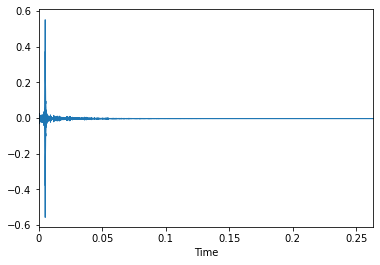

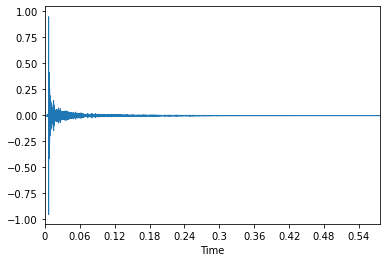

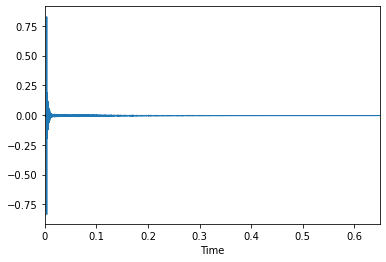

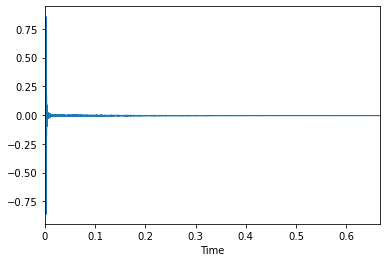

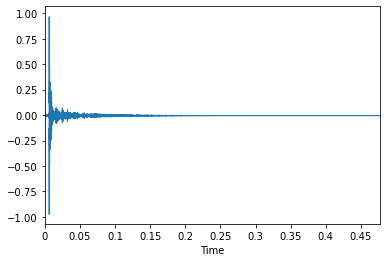

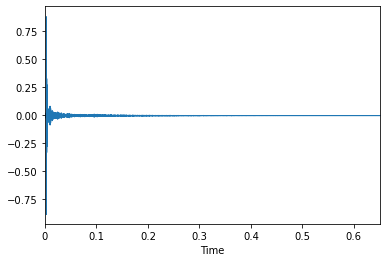

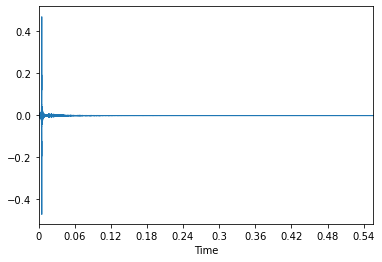

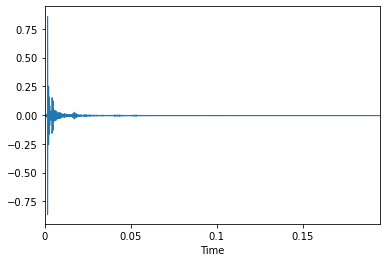

In [6]:
import glob
import librosa
from librosa import display
import matplotlib.pyplot as plt
for rir in glob.glob(os.path.join(rir_dir,'*')):
    fs, rir_sig = wavfile.read(rir)
    librosa.display.waveplot(rir_sig,fs)
    plt.show()